In [1]:
"""
Description: assignment for the python course. Instructions can be found
in ./description.txt
"""

'\nDescription: assignment for the python course. Instructions can be found\nin ./description.txt\n'

## General imports

In [2]:
import sys
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from collections import Counter
from itertools import cycle
%matplotlib inline

## Sorting a List Into Buckets

In [3]:
#Sorry for the extra content here. I was actually curious to see if
#one for loop was slower than three one-liners. Suprinsigly close.

files = ['inflammation-01.csv', 'myscript.py', 'inflammation-02.csv', 'small-01.csv', 'small-02.csv']

#Method 1. Loops through files more times, but uses the more elegant and efficient one-liners.
start_time = time.time()
large_files = [el for el in files if el.startswith('inflammation')]
small_files = [el for el in files if el.startswith('small')]
other_files = [el for el in files if ((el not in large_files) & (el not in small_files))]
print('Method 1 took %.6f' %(time.time() - start_time))

#Method 2. Single for loop.
start_time = time.time()
large_files = []
small_files = []
other_files = []
for el in files:
    if el.startswith('inflammation'):
        large_files.append(el)
    elif el.startswith('small'):
        small_files.append(el)
    else:
        other_files.append(el)
print('Method 2 took %.6f' %(time.time() - start_time))

print(large_files)
print(small_files)
print(other_files)

Method 1 took 0.000299
Method 2 took 0.000273
['inflammation-01.csv', 'inflammation-02.csv']
['small-01.csv', 'small-02.csv']
['myscript.py']


## Fixing and Testing

In [4]:
#Pre-determined rules:
#1) every overlap has to have non-zero width, and
#2) we will return the special value None when there’s no overlap.

#Note, further test cases, such as ensuring the input is a list containg
#tuples of floats could be implement by making creating a class
#and using @property. Not done here for concisiness.

def range_overlap(ranges):
    '''Return common overlap among a set of [low, high] ranges.'''
    lowest = -np.inf
    highest = np.inf
    for (low, high) in ranges:
        lowest = max(lowest, low)
        highest = min(highest, high)
    if highest <= lowest:
        return None
    else:
        return (lowest, highest)

def test_range_overlap():
    assert range_overlap([ (0.0, 1.0), (5.0, 6.0) ]) == None
    assert range_overlap([ (0.0, 1.0), (1.0, 2.0) ]) == None
    assert range_overlap([ (0.0, 1.0) ]) == (0.0, 1.0)
    assert range_overlap([ (2.0, 3.0), (2.0, 4.0) ]) == (2.0, 3.0)
    assert range_overlap([ (0.0, 1.0), (0.0, 2.0), (-1.0, 1.0) ]) == (0.0, 1.0)
    print('Function %s Successfully passed the tests in %s '
          %(range_overlap.__name__, test_range_overlap.__name__))
 
test_range_overlap()


Function range_overlap Successfully passed the tests in test_range_overlap 


## You do the rest
The codes are commented as they are not meant to be run as main in jupyter notebook.

In [5]:
#Exercise 1. Action as a flag.
'''
import sys
import numpy

def main():
    script = sys.argv[0]
    action = sys.argv[1]
    filenames = sys.argv[2:]

    for f in filenames:
        data = numpy.loadtxt(f, delimiter=',')
        try:
            opperation = getattr(numpy, action[2:])
            for m in opperation(data, axis=1):
                print(m)
        except:
            raise ValueError('Flag passed is invalid')

if __name__ == '__main__':
   main()
'''

#Exercise 2. Check action.
'''
import sys
import numpy

def perform_operation(_f,_opperation):
    data = numpy.loadtxt(_f, delimiter=',')
    for m in _opperation(data, axis=1):
        print(m)

def main():
    script = sys.argv[0]
    action = sys.argv[1]
    filenames = sys.argv[2:]

    #Test if an operation flag was passed. If true, define revelant function.
    if action.startswith('--'):
        try:
            opperation = getattr(numpy, action[2:])
        except:
            raise ValueError('Flag passed is invalid')
    else:
        raise ValueError('No flag was passed as an input.')

    #Loop over input files
    [perform_operation(f, opperation) for f in filenames]

if __name__ == '__main__':
   main()
'''

#Exercise 3. Standard input.
#Not entirely sure that this is what the problem wanted.
'''
import sys
import numpy

def perform_operation(_f,_opperation):
    data = numpy.loadtxt(_f, delimiter=',')
    for m in _opperation(data, axis=1):
        print(m)

def main():
    script = sys.argv[0]
    action = sys.argv[1]
    filenames = sys.argv[2:]
    
    #Test if an operation flag was passed. If true, define revelant function.
    if action.startswith('--'):
        try:
            opperation = getattr(numpy, action[2:])
        except:
            raise ValueError('Flag passed is invalid')
    else:
        raise ValueError('No flag was passed as an input.')

    #Check if files were passed in the standard format.
    if filenames:
        [perform_operation(f, opperation) for f in filenames]
    elif not sys.stdin.isatty():
        perform_operation(sys.stdin,opperation)
    else:
        raise ValueError('Could no find an files passed as input.')

if __name__ == '__main__':
   main()
'''


"\nimport sys\nimport numpy\n\ndef perform_operation(_f,_opperation):\n    data = numpy.loadtxt(_f, delimiter=',')\n    for m in _opperation(data, axis=1):\n        print(m)\n\ndef main():\n    script = sys.argv[0]\n    action = sys.argv[1]\n    filenames = sys.argv[2:]\n    \n    #Test if an operation flag was passed. If true, define revelant function.\n    if action.startswith('--'):\n        try:\n            opperation = getattr(numpy, action[2:])\n        except:\n            raise ValueError('Flag passed is invalid')\n    else:\n        raise ValueError('No flag was passed as an input.')\n\n    #Check if files were passed in the standard format.\n    if filenames:\n        [perform_operation(f, opperation) for f in filenames]\n    elif not sys.stdin.isatty():\n        perform_operation(sys.stdin,opperation)\n    else:\n        raise ValueError('Could no find an files passed as input.')\n\nif __name__ == '__main__':\n   main()\n"

## Restaurants!

In [6]:
#Find the restaurant with the minimum combined rank.
#If no matches, then the output should be 'yummy'.

def find_restaurant(r1,r2):
    '''Find restaurants that belong to both lits. If no matches,
    return yummy. If there are matches, compute combined rank
    and return restauran with the lowest combined rank.
    '''
    
    common = list(set(r1).intersection(r2))
    if not common:
        return 'yummy'
    else:
        ranks = [r1.index(r) + r2.index(r) + 2 for r in common]
        return common[np.argmin(np.asarray(ranks))]

restaurants_1 = ['El Farolito', 'Japa Curry', 'Eatsa']
restaurants_2 = ['Japa Curry', 'Eatsa', 'Ayola', 'Working Girls']

                 
def test_cases():
    assert find_restaurant(['El Farolito', 'Japa Curry', 'Eatsa'],
                           ['Japa Curry', 'Eatsa', 'Ayola', 'Working Girls']) == 'Japa Curry'
    assert find_restaurant(['El Farolito', 'Japa Curry'],
                           ['Ayola', 'Working Girls']) == 'yummy'

test_cases()

## greatest common divisor

In [7]:
def gcd(a,b):
    max_iter = 1000
    i = 1
    while i <= max_iter:
        out = b
        q, r = divmod(a,b)
        a, b = b, r
        if abs(r) < 1.e-6:
            break
        elif i == max_iter:
            out = np.nan
        i += 1
    return out

def test_cases():
    assert gcd(15,10) == 5
    assert gcd(10,15) == 5
    assert gcd(7,1) == 1
    assert gcd(1632,252) == 12

test_cases()

## Koch curve

In [8]:
#Define functions that initialize the shape
angles = cycle([1./3.*np.pi, -2./3.*np.pi, 1./3.*np.pi])

def make_triangle_shape(x):
    """Compute the vertice positions of a equilateral triangle
    of length x, with a vertice a (0,0).
    """
    side_len = x/3.
    v1 = np.array([0.,0.])
    v2 = np.array([side_len*np.cos(np.pi/3.),side_len*np.sin(np.pi/3.)])
    v3 = np.array([side_len,0.])
    angles = [np.pi/3., -np.pi/3., -np.pi]
    lengths = [side_len, side_len, side_len]
    return [v1,v2,v3,v1], angles, lengths

def make_P_shape(x):
    """Compute the vertice positions of an abitrary shape that resembles
    the 'P' letter.
    """
    v1 = np.array([0.,0.])
    v2 = np.array([0.,2.*x/5.])
    v3 = np.array([x/5.,2.*x/5.])
    v4 = np.array([x/5.,x/5.])
    v5 = np.array([0.,x/5.])
    angles = [np.pi/2., 0.,-np.pi/2. , -np.pi]
    lengths = [2.*x/5.,x/5.,x/5.,x/5.]
    return list([v1,v2,v3,v4,v5]), angles, lengths

In [9]:
def koch_line(A,l,theta):
    """Given a line segment that starts at A and ends at B,
    return 3 points that define an equilateral triangle whose
    base intersects the segment symmetrically. The length l
    is passed as a parameter to avoid repeating the same calculation.
    """
    new_l = l/3.
    angle_out = []
    
    def update_seg(v,theta):
        angle_out.append(theta)
        return v + np.array([new_l*np.cos(theta), new_l*np.sin(theta)])
    
    c1 = update_seg(A,theta)
    theta += next(angles)        
    c2 = update_seg(c1,theta)
    theta += next(angles)  
    c3 = update_seg(c2,theta)
    theta += next(angles)  
    c4 = update_seg(c3,theta)
    
    return [A,c1,c2,c3], angle_out, [new_l, new_l, new_l, new_l]

In [10]:
def koch_figure(x, shape):
    """Given the shape input, call 'make_triangle_shape' or 'make_P_shape'
    to compute the initial vertices. Then iterate of these line segments
    according to Koch fractals, using the 'Koch_line' function.
    """
    
    out = {}
    if shape == 'triangle':
        out['v0'], out['a0'], out['l0'] = make_triangle_shape(x)
    elif shape == 'P':
        out['v0'], out['a0'], out['l0'] = make_P_shape(x)
    for i in range(1,6):
        out['v' + str(i)] = []
        out['a' + str(i)] = []
        out['l' + str(i)] = []
        for v, v_next, theta, l in zip(
          out['v' + str(i-1)], out['v' + str(i-1)][1:],
           out['a' + str(i-1)], out['l' + str(i-1)]):
            seg, ang, leng = koch_line(v,l,theta)
            out['v' + str(i)] += seg
            out['a' + str(i)] += ang
            out['l' + str(i)] += leng
        #Append initial vertice to close the loop and for plotting.
        out['v' + str(i)].append(out['v' + str(i-1)][0])
    return out

In [11]:
def make_figure(results):
    fig = plt.figure()
    for i in range(6):
        ax = fig.add_subplot(2,3,i+1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(axis='both', which='both', bottom=False, left=False)
        data = np.transpose(results['v' + str(i)])
        ax.plot(data[0], data[1], lw=1, c='k')
    plt.subplots_adjust(wspace=0., hspace=0.)

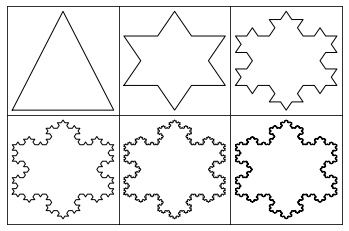

In [12]:
results_triangle = koch_figure(3., 'triangle')
make_figure(results_triangle)

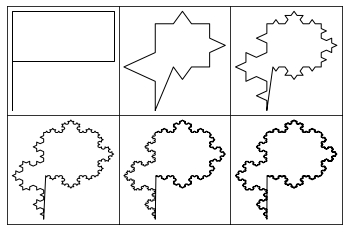

In [13]:
results_P = koch_figure(3., 'P')
make_figure(results_P)